In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)




In [4]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [6]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)
aapl = quandl.get('WIKI/AAPL',start_date=start,end_date=end)

In [29]:
aapl['Adj. Close'].describe()

count    2322.000000
mean       78.947655
std        42.496183
min        10.049790
25%        44.354015
50%        73.338085
75%       108.620758
max       181.720000
Name: Adj. Close, dtype: float64

In [7]:
raw_seq=aapl['Adj. Close'].values

In [8]:
# choose a number of time steps
n_steps = 8
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1


In [9]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [10]:
X_train.shape

(1851, 8)

In [11]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 4
X = X_train.reshape((X_train.shape[0], n_seq,1, n_steps, n_features))

In [12]:
X_train[-1], y_train[-1]

(array([ 91.29820646,  90.40887476,  88.28816069,  88.46407246,
         91.74775875,  91.36661659,  92.41231431,  92.06049078]),
 93.057324121036004)

In [13]:
X.shape, y_train.shape

((1851, 2, 1, 4, 1), (1851,))

In [14]:
X[-1], y_train[-1]

(array([[[[ 91.29820646],
          [ 90.40887476],
          [ 88.28816069],
          [ 88.46407246]]],
 
 
        [[[ 91.74775875],
          [ 91.36661659],
          [ 92.41231431],
          [ 92.06049078]]]]), 93.057324121036004)

In [15]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

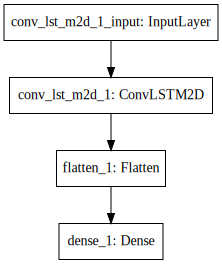

In [16]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
history=model.fit(X, y_train, epochs=500, verbose=2, validation_split=0.15, shuffle=False)

Train on 1573 samples, validate on 278 samples
Epoch 1/500
 - 1s - loss: 673.7997 - val_loss: 19.7833
Epoch 2/500
 - 0s - loss: 13.1310 - val_loss: 17.2218
Epoch 3/500
 - 0s - loss: 5.0853 - val_loss: 18.8856
Epoch 4/500
 - 0s - loss: 4.8010 - val_loss: 11.7374
Epoch 5/500
 - 0s - loss: 4.0724 - val_loss: 12.0573
Epoch 6/500
 - 0s - loss: 3.8353 - val_loss: 12.8211
Epoch 7/500
 - 0s - loss: 3.6473 - val_loss: 12.7228
Epoch 8/500
 - 0s - loss: 3.6906 - val_loss: 12.3017
Epoch 9/500
 - 0s - loss: 3.7702 - val_loss: 13.0674
Epoch 10/500
 - 0s - loss: 3.8212 - val_loss: 12.5440
Epoch 11/500
 - 0s - loss: 3.9265 - val_loss: 13.5587
Epoch 12/500
 - 0s - loss: 3.8969 - val_loss: 12.1953
Epoch 13/500
 - 0s - loss: 4.1425 - val_loss: 12.9071
Epoch 14/500
 - 0s - loss: 4.2132 - val_loss: 12.4143
Epoch 15/500
 - 0s - loss: 4.4139 - val_loss: 11.7780
Epoch 16/500
 - 0s - loss: 4.2647 - val_loss: 11.1192
Epoch 17/500
 - 0s - loss: 4.4374 - val_loss: 10.9798
Epoch 18/500
 - 0s - loss: 4.7865 - val_l

Epoch 153/500
 - 0s - loss: 1.7394 - val_loss: 8.5324
Epoch 154/500
 - 0s - loss: 1.7191 - val_loss: 4.1533
Epoch 155/500
 - 0s - loss: 2.1452 - val_loss: 4.3986
Epoch 156/500
 - 0s - loss: 2.4695 - val_loss: 6.3373
Epoch 157/500
 - 0s - loss: 2.2228 - val_loss: 5.1344
Epoch 158/500
 - 0s - loss: 2.3836 - val_loss: 4.6584
Epoch 159/500
 - 0s - loss: 2.1891 - val_loss: 6.4235
Epoch 160/500
 - 0s - loss: 1.5663 - val_loss: 4.7723
Epoch 161/500
 - 0s - loss: 1.6761 - val_loss: 5.7317
Epoch 162/500
 - 0s - loss: 1.3983 - val_loss: 5.6545
Epoch 163/500
 - 0s - loss: 1.3774 - val_loss: 5.4513
Epoch 164/500
 - 0s - loss: 1.3949 - val_loss: 5.3902
Epoch 165/500
 - 0s - loss: 1.3992 - val_loss: 5.6100
Epoch 166/500
 - 0s - loss: 1.3426 - val_loss: 5.0775
Epoch 167/500
 - 0s - loss: 1.2942 - val_loss: 6.9617
Epoch 168/500
 - 0s - loss: 1.4054 - val_loss: 6.1077
Epoch 169/500
 - 0s - loss: 1.4101 - val_loss: 6.7814
Epoch 170/500
 - 0s - loss: 1.5791 - val_loss: 3.8141
Epoch 171/500
 - 0s - loss: 

Epoch 305/500
 - 0s - loss: 1.4089 - val_loss: 5.6608
Epoch 306/500
 - 0s - loss: 1.3285 - val_loss: 4.0973
Epoch 307/500
 - 0s - loss: 1.4619 - val_loss: 6.9992
Epoch 308/500
 - 0s - loss: 1.4728 - val_loss: 3.9811
Epoch 309/500
 - 0s - loss: 1.4593 - val_loss: 7.3368
Epoch 310/500
 - 0s - loss: 1.2811 - val_loss: 4.9822
Epoch 311/500
 - 0s - loss: 1.4247 - val_loss: 6.2927
Epoch 312/500
 - 0s - loss: 1.3991 - val_loss: 4.8463
Epoch 313/500
 - 0s - loss: 1.2529 - val_loss: 4.5877
Epoch 314/500
 - 0s - loss: 1.2199 - val_loss: 6.1622
Epoch 315/500
 - 0s - loss: 1.2658 - val_loss: 5.8694
Epoch 316/500
 - 0s - loss: 1.2093 - val_loss: 5.8376
Epoch 317/500
 - 0s - loss: 1.3155 - val_loss: 6.5457
Epoch 318/500
 - 0s - loss: 1.2593 - val_loss: 4.1329
Epoch 319/500
 - 0s - loss: 1.3557 - val_loss: 5.6084
Epoch 320/500
 - 0s - loss: 1.3158 - val_loss: 6.3402
Epoch 321/500
 - 0s - loss: 1.4772 - val_loss: 4.8846
Epoch 322/500
 - 0s - loss: 1.5285 - val_loss: 5.7561
Epoch 323/500
 - 0s - loss: 

Epoch 457/500
 - 0s - loss: 1.5961 - val_loss: 3.7637
Epoch 458/500
 - 0s - loss: 1.3159 - val_loss: 3.5281
Epoch 459/500
 - 0s - loss: 2.0065 - val_loss: 5.9734
Epoch 460/500
 - 0s - loss: 2.1214 - val_loss: 3.7467
Epoch 461/500
 - 0s - loss: 2.4532 - val_loss: 4.2401
Epoch 462/500
 - 0s - loss: 2.3219 - val_loss: 4.2371
Epoch 463/500
 - 0s - loss: 1.7700 - val_loss: 3.7490
Epoch 464/500
 - 0s - loss: 1.5161 - val_loss: 3.5682
Epoch 465/500
 - 0s - loss: 1.5546 - val_loss: 3.7016
Epoch 466/500
 - 0s - loss: 1.4368 - val_loss: 3.5741
Epoch 467/500
 - 0s - loss: 1.4889 - val_loss: 5.1382
Epoch 468/500
 - 0s - loss: 1.5158 - val_loss: 4.1328
Epoch 469/500
 - 0s - loss: 1.3761 - val_loss: 5.4409
Epoch 470/500
 - 0s - loss: 1.2709 - val_loss: 5.1147
Epoch 471/500
 - 0s - loss: 1.2192 - val_loss: 4.4913
Epoch 472/500
 - 0s - loss: 1.2789 - val_loss: 4.2914
Epoch 473/500
 - 0s - loss: 1.2484 - val_loss: 5.4257
Epoch 474/500
 - 0s - loss: 1.1780 - val_loss: 5.3407
Epoch 475/500
 - 0s - loss: 

In [18]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'ConvLSTM2D_apple_' + mytime 

In [19]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 30)

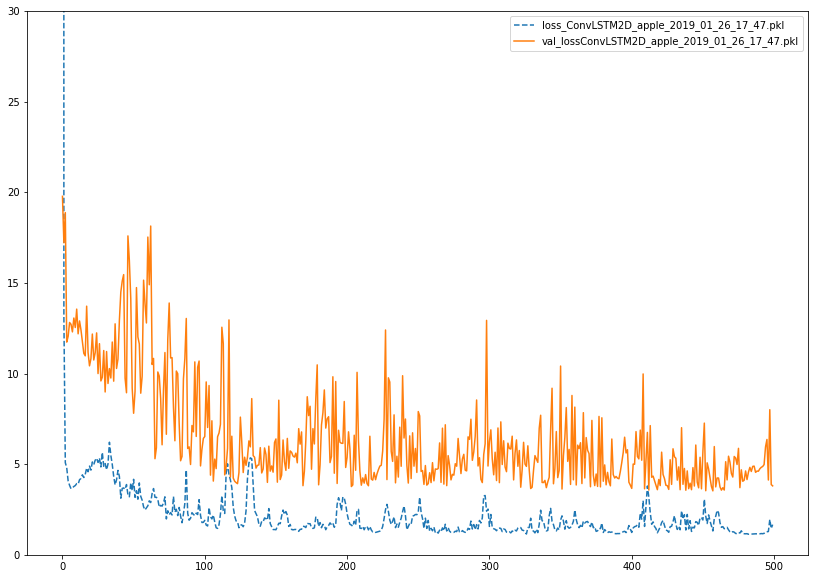

In [22]:
histories = ['ConvLSTM2D_apple_2019_01_26_17_47.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 30)

In [23]:
X_t = X_test.reshape((X_test.shape[0], n_seq,1, n_steps, n_features))

In [24]:
yhat = model.predict(X_t, verbose=2)

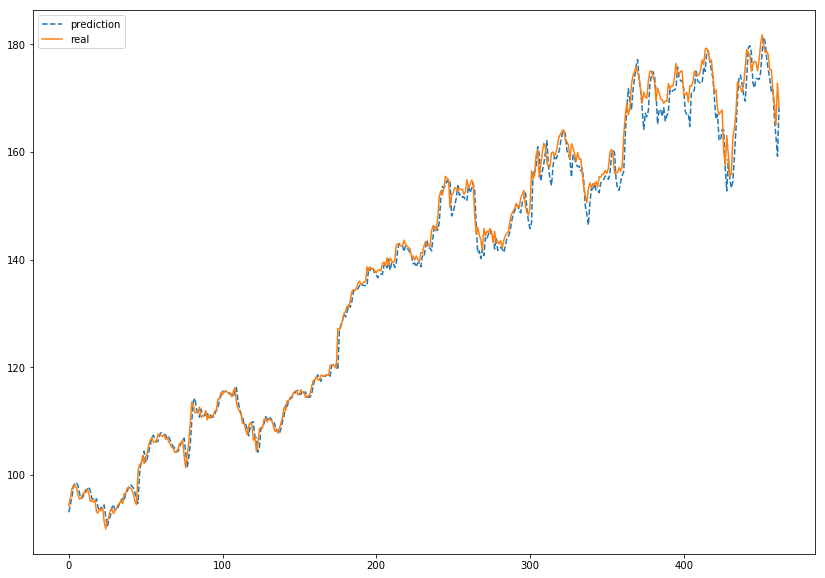

In [25]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat,label ='prediction' ,linestyle='--')
plt.plot(y_test,label='real' )
plt.legend()

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
r2_score(y_test, yhat) 

0.99259360727662915

In [28]:
mean_squared_error(y_test, yhat) 

5.3735531409577693